In [50]:
import pandas as pd
import seaborn as sns
import numpy as np
from IPython.display import display

import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")##ggplot ; fivethirtyeight
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (6,4) #Adjusts the configuration of the plots we will create
                                              # Ajustando la configuración de los siguientes gráficos.



#Read data
#Leyendo los datos
df = pd.read_csv(r"C:\Users\Javi\Desktop\DATA ANALYSIS PROJECT COVID\Movies IMDB Project\movies.csv")

In [51]:
#check de columns for displaying the total.
# Revisando las columnas, filas, etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [52]:
#Display the totality of columns, and 100 rows.
#Mostrar la totalidad de columnas y 100 filas.

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows", 100 )

In [53]:
#looking at the data
df.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [54]:
# Let's see if there is any missing data.
#Chequear datos nulos.
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [55]:
# Another way of calculate the proportion of null or missing values.
# Otra manera de chequear los datos nulos.

#With the df[col].isnull() will return a True/False mask, True == 1 and False == 0, the np.mean will calculate the poportions of NULL of each column.

# Con df[col].isnull() vamos a obtener una mascara de valores verdaderos o falsos, entonces con np.mean nos va a devolver las proporciones de cada columna
# para los datos nulos.
for col in df.columns:
    pct_mss = np.mean(df[col].isnull())*100
    print("{} - {} %".format(col,pct_mss))
  
# print("La suma de los valores nulos es:\n",df.isnull().sum())

name - 0.0 %
rating - 1.004173187271779 %
genre - 0.0 %
year - 0.0 %
released - 0.02608242044861763 %
score - 0.03912363067292645 %
votes - 0.03912363067292645 %
director - 0.0 %
writer - 0.03912363067292645 %
star - 0.013041210224308816 %
country - 0.03912363067292645 %
budget - 28.31246739697444 %
gross - 2.464788732394366 %
company - 0.2217005738132499 %
runtime - 0.05216484089723526 %


In [56]:
#Data types of our columns

df.info()
#df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [57]:
#A summary of the entire dataframe. the 50% value is the median 
# and it is more useful than the mean because the mean will be distorted by outliers

#Un resumen de el dataframe entero. La mediana es igual a el 50%, es mas util que la media porque no está tan sesgada por los valores
#atípicos.

df.describe()#include="all")

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [58]:
#mask = df["star"] == "Nicolas Cage") & (df["director"] == "Woody Allen")
#df.loc[mask,["gross","budget"]].describe()

In [59]:
# Filling the NA values an changing the data types of gross column and budget column, getting rid of the decimal.
# Llenamos los valores nulos con 0 para que nos permita cambiar el tipo de dato de las columnas margen bruto y prespuesto y deshacernos del decimal.

df["budget"] = df["budget"].fillna(0)
df["budget"] = df["budget"].astype("int64")
df["gross"] = df["gross"].fillna(0)
df["gross"] = df["gross"].astype("int64")

In [60]:
# Make a new column with the years, extracted from the released year, because the year sometimes doesn't match with the
# released year and the year in the released column seems correct.

#Hacemos una nueva columna con los años, extraídos estos desde la columna "released year", porque la columna "year" 
# no es totalmente exacta y la columna "released" si lo es.
df['yearsConverted'] = df['released'].str.extract(r'(\d{4})').astype(str)


In [61]:
## Sorting the values by gross revenue
# Ordenando los valores por ingresos brutos..
df = df.sort_values(by=["gross"],inplace=False,ascending=False)
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearsConverted
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,"January 26, 1990 (United States)",4.5,274.0,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92.0,1990
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989 (United States)",5.2,1300.0,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85.0,1989
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989 (United States)",6.0,2900.0,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89.0,1989
1601,My Twentieth Century,NaN,Comedy,1989,"January 13, 1990 (Japan)",7.1,1500.0,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104.0,1990


In [62]:
## Drop only duplicates.
# Can be used in any particular column or in multiple columns or the entire DataFrame.
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearsConverted
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,"January 26, 1990 (United States)",4.5,274.0,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92.0,1990
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989 (United States)",5.2,1300.0,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85.0,1989
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989 (United States)",6.0,2900.0,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89.0,1989
1601,My Twentieth Century,NaN,Comedy,1989,"January 13, 1990 (Japan)",7.1,1500.0,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104.0,1990


### Search for a correlation, like budget and gross.
###  Premise : The bigger the budget, the bigger the gross of the fil

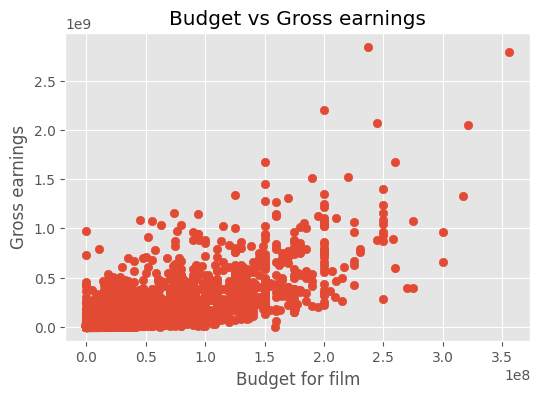

In [64]:
## Build a scatter plot with budget vs gross revenue.
## Construir un grafico de dispersión vs margen

plt.scatter(x=df["budget"],y=df["gross"])

plt.title("Budget vs Gross earnings")
plt.xlabel("Budget for film")
plt.ylabel("Gross earnings")
plt.show()

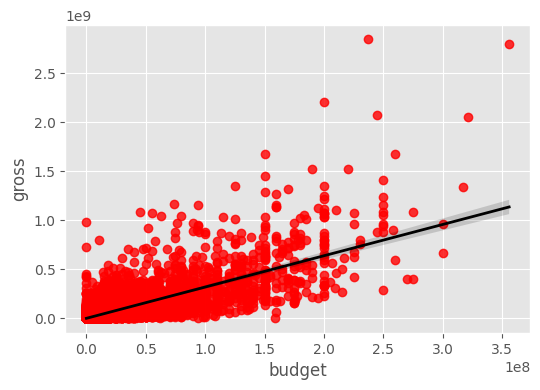

In [65]:
## Doing a REG PLOT (Regresion plot) using Seaborn.
## Haciendo un grafico de REG, usando seaborn.
sns.regplot(x=df["budget"],y=df["gross"],data=df, scatter_kws = {"color":"red"},line_kws= {"color":"black","linewidth": 2})
plt.show()

## **Searching for the correlation between these two variables and find out that there**
### is 75% of correlation between budget and gross revenue with the pearson method and 54.19% with the kendall method.
### in this example, i am using the kendall method because:

### 1: The pearson method assumes that the variables have a normal distribution and that the relationship between them is linear *
### 2: the spearman method,like the kendall method, does not assume that the variables have a specific distribution but it is less robust to outliers than Kendall's Tau (τ)

### *In the graphs below i am checking the normal probability of both column, gross and budget, and then deciding wich method use.

## **Buscando por la correlación entre esas dos variables encontramos que:**
### Hay 75% de correlación entre presupuesto y ingresos brutos con el método pearson y 54,19% con el método Kendall.
### en este ejemplo, voy a utilziar el método kendall porque:
### 1: El método pearson asume que las variables tienen una distribución normal y que la relación entre ellas es linear
### 2: El método spearman, al igual que el metodo kendall, no asume que las varibles tengan una distribución específica pero es menos robusto para los valores 
### atípicos que la Tau  (τ) de Kendall.

### *En los gráficos de abajo, estoy chequeando la probabilidad normal de ambas columnas, presupuesto e ingreso bruto, y decido que método utilizar..


In [66]:
correlation_matrix = df.corr(method="kendall",numeric_only=True) # By default method, pearson correlation. There is also kendall and spearman methods.
correlation_matrix

,year,score,votes,budget,gross,runtime
year,1.000000,0.067652,0.331465,0.209304,0.216595,0.097184
score,0.067652,1.000000,0.300115,-0.005194,0.090626,0.283611
votes,0.331465,0.300115,1.000000,0.439902,0.560118,0.198240
budget,0.209304,-0.005194,0.439902,1.000000,0.541956,0.176016
gross,0.216595,0.090626,0.560118,0.541956,1.000000,0.176912
runtime,0.097184,0.283611,0.198240,0.176016,0.176912,1.000000


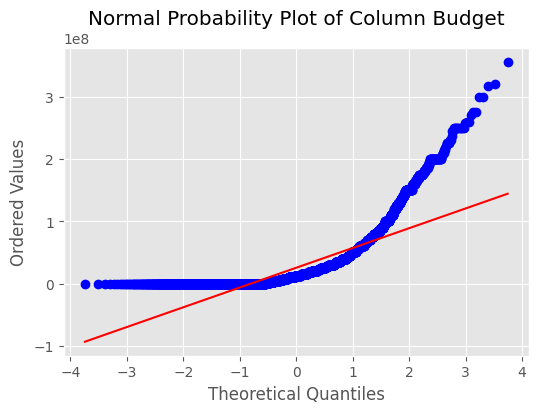

In [67]:
#checking the normal probability of column budget
# revisando la probabilidad normal de la columna prespuesto
from scipy import stats


stats.probplot(df["budget"], dist='norm', plot=plt)
plt.title('Normal Probability Plot of Column Budget')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.show()

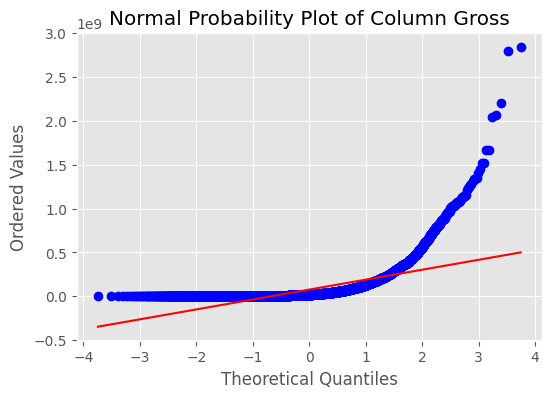

In [68]:
# checking the normal probability of column gross
# revisando la probabilidad normal de la columna ingreso bruto
stats.probplot(df["gross"], dist='norm', plot=plt)
plt.title('Normal Probability Plot of Column Gross')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.show()

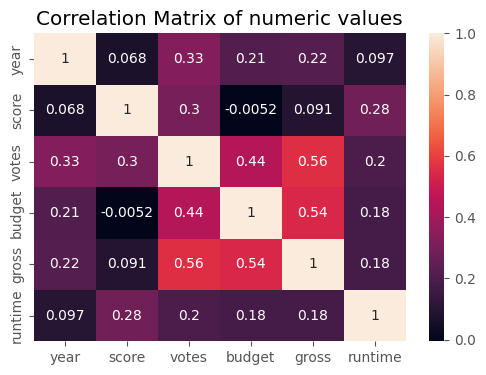

In [69]:
#And with this analysis, we can see medium-high correlation between gross and budget.
#Con este analisis, podemos ver una correlation media-alta entre prespuesto y ingresos brutos.
#Heat MAP
#Mapa de calor

correlation_matrix = df.corr(method="kendall",numeric_only=True)

sns.heatmap(correlation_matrix,annot=True)
plt.title("Correlation Matrix of numeric values")
plt.show()

In [70]:
# Tansforming the objects of every object column to numbers, so we can see the correlation for 
# example between company and gross
# Transformando los objetos de cada columna que tenga objetos a numeros, asi podemos ver la correlación
# como por ejemplo, entre companía y ingreso bruto.

numerize_df = df.copy()

for col in numerize_df.columns:
    if(numerize_df[col].dtype == "object"):
        numerize_df[col] = numerize_df[col].astype("category")
        numerize_df[col] = numerize_df[col].cat.codes

In [105]:
numerize_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearsConverted
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,29
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,39
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,17
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,35
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,38


In [106]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearsConverted
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


### Discovering a new correlation between votes vs gross and votes vs budet
### Descubriendo una nueva correlación, votos vs ingresos brutos y votos vs prespuesto.


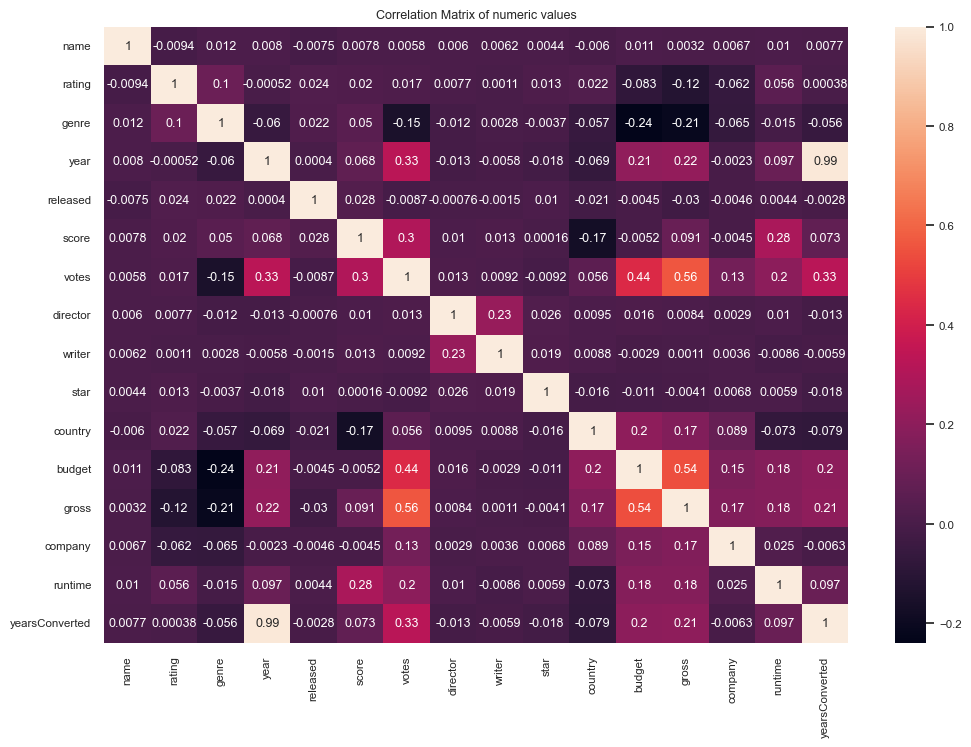

In [104]:
# Watching the matrix of correlation as a heatmap, but now it include the entire DATAFRAME.
# as we can see, there is no correlation between company and gross revenue or company and budget
# But, we can see a correlation between the gross revenue and the votes.

# Mirando la matriz de correlación como un mapa de calor, pero ahora incluye el DATAFRAME entero.
# como podemos ver, no hay correlación entre companía y ingresos brutos o companía y presupuesto
#pero podemos ver una correlación entre ingresos brutos y votos.


correlation_matrix2 = numerize_df.corr(method="kendall",numeric_only=True)

sns.set(font_scale=0.75)

sns.heatmap(correlation_matrix2,annot=True)
plt.title("Correlation Matrix of numeric values")
plt.show()

In [107]:
correlation_matrix2

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearsConverted
name,1.000000,-0.009373,0.011615,0.007957,-0.007514,0.007769,0.005842,0.005961,0.006196,0.004366,-0.005985,0.010579,0.003247,0.006715,0.010191,0.007727
rating,-0.009373,1.000000,0.100890,-0.000516,0.023896,0.019863,0.017004,0.007735,0.001079,0.013431,0.022408,-0.082679,-0.120428,-0.061833,0.055823,0.000385
genre,0.011615,0.100890,1.000000,-0.059866,0.021527,0.049721,-0.149969,-0.012338,0.002779,-0.003664,-0.056763,-0.238948,-0.209988,-0.065025,-0.015251,-0.056337
year,0.007957,-0.000516,-0.059866,1.000000,0.000399,0.067652,0.331465,-0.013311,-0.005800,-0.018181,-0.068822,0.209304,0.216595,-0.002283,0.097184,0.987387
released,-0.007514,0.023896,0.021527,0.000399,1.000000,0.027612,-0.008681,-0.000762,-0.001510,0.010395,-0.020635,-0.004453,-0.029738,-0.004634,0.004405,-0.002818
score,0.007769,0.019863,0.049721,0.067652,0.027612,1.000000,0.300115,0.010082,0.013060,0.000163,-0.172293,-0.005194,0.090626,-0.004454,0.283611,0.073095
votes,0.005842,0.017004,-0.149969,0.331465,-0.008681,0.300115,1.000000,0.012942,0.009177,-0.009153,0.056417,0.439902,0.560118,0.125344,0.198240,0.325918
director,0.005961,0.007735,-0.012338,-0.013311,-0.000762,0.010082,0.012942,1.000000,0.227312,0.026451,0.009532,0.015867,0.008428,0.002917,0.010240,-0.013034
writer,0.006196,0.001079,0.002779,-0.005800,-0.001510,0.013060,0.009177,0.227312,1.000000,0.018635,0.008789,-0.002856,0.001149,0.003640,-0.008642,-0.005880
star,0.004366,0.013431,-0.003664,-0.018181,0.010395,0.000163,-0.009153,0.026451,0.018635,1.000000,-0.016154,-0.011379,-0.004127,0.006753,0.005899,-0.018352


In [117]:
## Unstacking the matrix so we can see the pairs between variables.
## Desapilar la matriz para poder ver los pares entre variables.

corr_pairs = correlation_matrix2.unstack()
corr_pairs

name            name              1.000000
                rating           -0.009373
                genre             0.011615
                year              0.007957
                released         -0.007514
                                    ...   
yearsConverted  budget            0.199835
                gross             0.205909
                company          -0.006304
                runtime           0.096999
                yearsConverted    1.000000
Length: 256, dtype: float64

In [119]:
## Sorting the values
## Ordenando los valores

sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre           budget           -0.238948
budget          genre            -0.238948
genre           gross            -0.209988
gross           genre            -0.209988
score           country          -0.172293
                                    ...   
year            year              1.000000
genre           genre             1.000000
rating          rating            1.000000
runtime         runtime           1.000000
yearsConverted  yearsConverted    1.000000
Length: 256, dtype: float64

## Conclusions
### **1- As we can see, the budget have high correlation with the gross revenue.**
### **2- Now we know, the votes also have a high correlation with the gross revenue.**
### **3- Votes and Budget have the highest correlation with the Gross Revenue**
### **4- Company have no correlation with the Gross Revenue**

## Conclusiones
### **1- Como podemos ver, el presupuesto tiene una alta correlación con los ingresos brutos.**
### **2- Ahora sabemos, los votos también tienen una alta correlación con los ingresos brutos.**
### **3- Votos y Presupuesto tienen la mayor correlación con los Ingresos Brutos.**
### **4- La empresa no tiene correlación con los ingresos brutos**


In [131]:
## Mostrando solamente los valores de correlación mayores a 0.5
## Showing only the values of correlation higher than 0.5

high_corr = sorted_pairs[(corr_pairs)>0.5]
high_corr

budget          gross             0.541956
gross           budget            0.541956
                votes             0.560118
votes           gross             0.560118
yearsConverted  year              0.987387
year            yearsConverted    0.987387
name            name              1.000000
company         company           1.000000
gross           gross             1.000000
budget          budget            1.000000
country         country           1.000000
star            star              1.000000
writer          writer            1.000000
director        director          1.000000
votes           votes             1.000000
score           score             1.000000
released        released          1.000000
year            year              1.000000
genre           genre             1.000000
rating          rating            1.000000
runtime         runtime           1.000000
yearsConverted  yearsConverted    1.000000
dtype: float64